# Week 3 - Exploratory Data Analysis

## <span style="color:#1A9FFF">Workshop Outline</span>

* ** 1. Matplotlib Basics **
    + Tut 1a: Intro to Matplotlib
    + Tut 1b: Various types of plots
    + Tut 1c: Handling Subplot
    + Exercise 1
    + 10 minutes break


* ** 2. Plots from Pandas **
    + Tut 2a: Quick Start
    + Tut 2b: Other Plots
    + Tut 2c: Plotting directly with matplotlib
    + Exercise 2
    + 10 minutes break


# <span style="color:#1A9FFF"> 1. Matplotlib Basics </span>
## <span style="color:#1A9FFF">Tut 1a Intro to Matplotlib</span>
<ul>
    <li>Import Libraries</li>
    <li>Generate simple plot and save plot to local files</li>
    <li>Two interfaces</li>
</ul>

###  Import Libraries

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

Note that 

** `%matplotlib inline` : **   leads to static images of your plot embedded in the notebook.

** `%matplotlib notebook` : ** leads to interactive plots embedded within the notebook 

### Now Let's Try out some plots

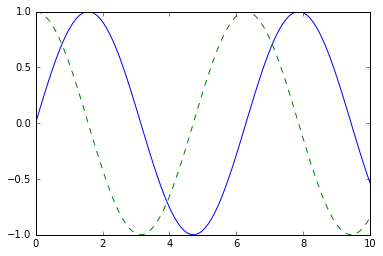

In [4]:
# Create sample data
x = np.linspace(0, 10, 100) # generate 100 numbers with fixed interval from 0 to 10
y1 = np.sin(x)
y2 = np.cos(x)

# Create Figure object
fig = plt.figure()

# Draw Plot
plt.plot(x, y1, '-')    # with solid line
plt.plot(x, y2, '--')   # with dashed line

# Display the Plot
plt.show()

# Save the plot into local files
fig.savefig('my_figure.png')

Check out the saved file 'my_figure.png'

windows: !dir

Macbook or Linux based: !ls

In [136]:
!dir

/bin/sh: dir: command not found


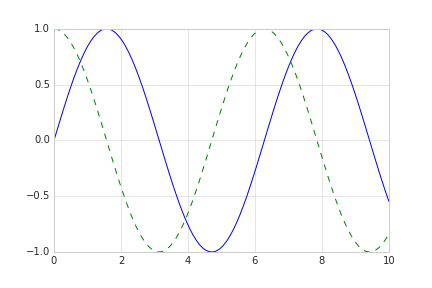

In [137]:
# Of course if you want to import a local image:
from IPython.display import Image
Image('my_figure.png')

### Two interfaces for the price of one
Matplotlib supports two interfaces, MATLAB-style interface and Object-oriented Interface. 

Imagine we wish to have a figure containing two subplots
### MATLAB-style interface

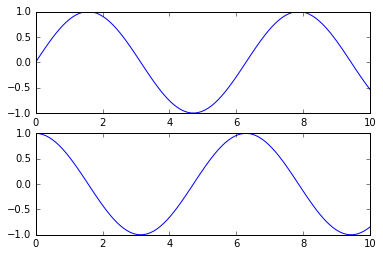

In [6]:
# Create a plot figure
plt.figure()

# create the first panel and set current axis
plt.subplot(2, 1, 1) # in total 2 rows, 1 cols, current axis is the 1st axis
plt.plot(x, y1)

# create the second panel and set current axis
plt.subplot(2, 1, 2) # in total 2 rows, 1 cols, current axis is the 2nd axis
plt.plot(x, y2);

### Object-oriented Interface
For more complicated situation, you may want more control over your figure.

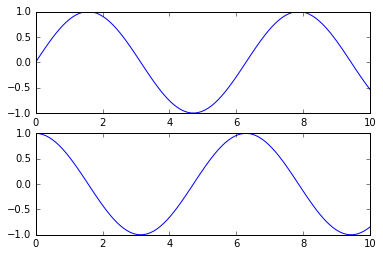

In [5]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# call plot() method on the appropriate object
ax[0].plot(x, y1)
ax[1].plot(x, y2);

## <span style="color:#1A9FFF">Tut 1b Various types of Plot</span>
<ul>
    <li>Simple Line Plots</li>
    <li>Simple Scatter Plots</li>
    <li>Density and contour Plots</li>
    <li>Histogram</li>
    <li>Three Dimensional Plotting</li>
</ul>

### Simple Line Plots

In fact, the plots we just saw are simple line plots.

Let's change the plot style first.

We'll migrate to seaborn in the last session

In [140]:
plt.style.use('seaborn-whitegrid')

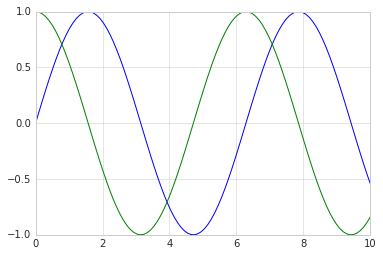

In [141]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x, y1)
ax.plot(x, y2);

Adjusting Line colors

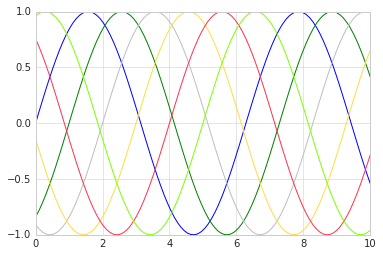

In [142]:
plt.plot(x, np.sin(x - 0), color='blue')          # specify color by name
plt.plot(x, np.sin(x - 1), color='g')             # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')          # grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')       # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.3)) # RGB tuple, values between 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse');   # all HTML color names supported

Adjusting Line Style

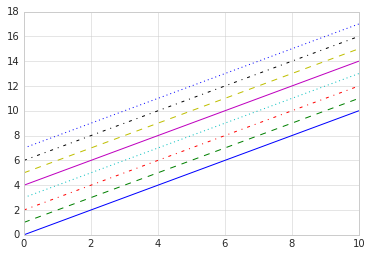

In [143]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

plt.plot(x, x + 4, linestyle='-')      # solid line
plt.plot(x, x + 5, linestyle='--')     # dashed line
plt.plot(x, x + 6, linestyle='-.')     # dashdot line
plt.plot(x, x + 7, linestyle=':');     # dotted line

Adjusting the axes limit, adding labels and legends

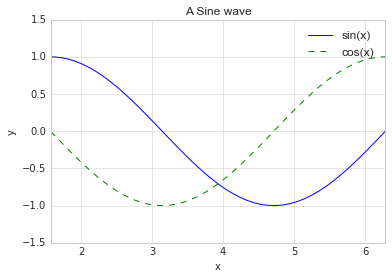

In [144]:
plt.plot(x, y1, '-',  label='sin(x)')
plt.plot(x, y2, '--', label='cos(x)')

# list: [xmin, xmax, ymin, ymax]
plt.axis([np.pi/2, np.pi*2, -1.5, 1.5])

# Adding Title and axes labels
plt.title('A Sine wave')
plt.xlabel('x')
plt.ylabel('y');

# display legend based on "label" parameter defined above in plt.plot()
plt.legend();

### Simple Scatter Plots

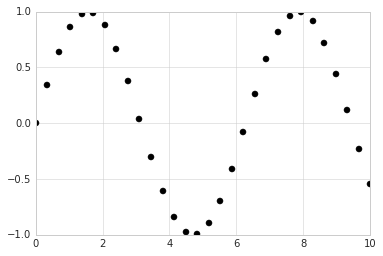

In [145]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

Note here 'o' means a solid dot

To display a number of common symbols:

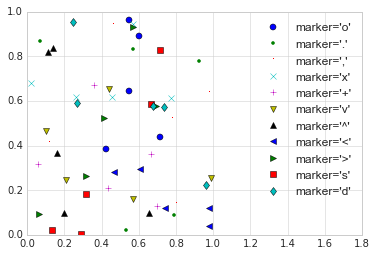

In [146]:
# Random state
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

(-1.2, 1.2)

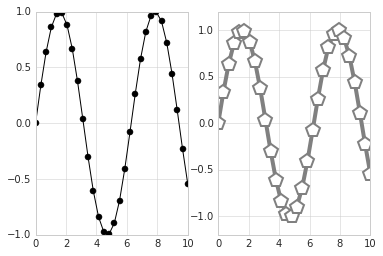

In [147]:
# Let's try a combination of line and point (marker) plot
plt.subplot(1, 2, 1)
plt.plot(x, y, '-ok');

# Additional arguments to specify a wide range of properties of the lines and markers
plt.subplot(1, 2, 2)
plt.plot(x, y, '-p',    color='gray', 
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2)

Matplotlib provides a more power method: `plt.scatter()`,

where the properties of each individual point (size, face color, edge color, transparency etc.) can be individually controlled

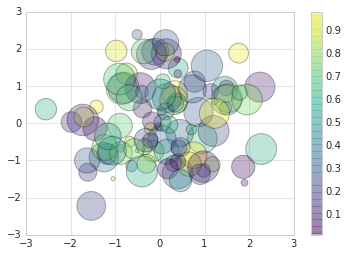

In [148]:
# Random number generator
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();

### Histograms

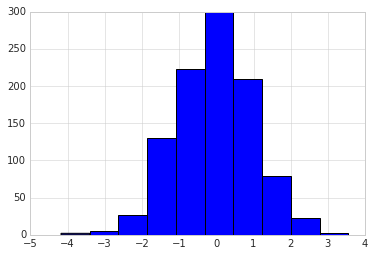

In [149]:
# Let's generate some data with normal/gaussian distribution
data = np.random.randn(1000)
plt.hist(data);

The `hist()` function has many options to tune both the calculation and the display:

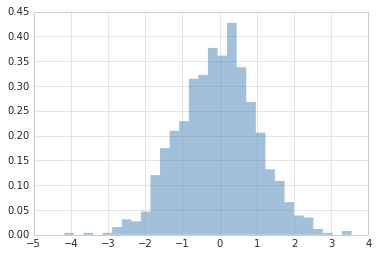

In [150]:
plt.hist(data, bins=30, normed=True, 
         alpha=0.5, histtype='stepfilled', 
         color='steelblue', edgecolor='none');

Suppose we wish to compare different distributions, we can make use of the transparency `alpha` attribute:

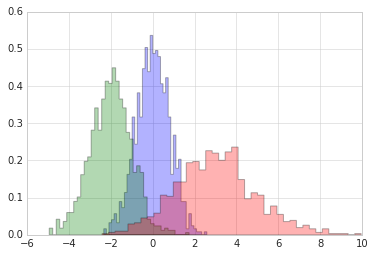

In [151]:
# sample data from three different normal distribution
# parameter: [mean, stddev, number_of_samples]
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs);
plt.hist(x2, **kwargs);
plt.hist(x3, **kwargs);

Here `kwargs` is a python dictionary object, meaning "keyword arguments", containing keyward-value pairs.

### Three Dimensional Plotting
We can enable three-dimensional plots by importing the `mplot3d` toolkit

In [152]:
from mpl_toolkits import mplot3d

# change to interactive figures instead of static images
%matplotlib inline

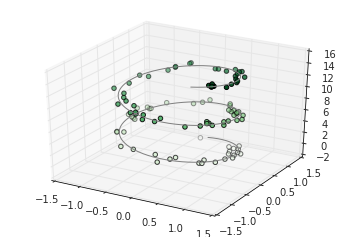

In [153]:
# Create an figure with 3d axes
fig = plt.figure()
ax = plt.axes(projection='3d')

# 3D Line Plot
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 3D Scatter plot
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Note that we can change the plot size by adjusting the small triangle at bottom-right corner.

Let's check out the 3D contour and surface plot:

Suppose we wish to plot below function:

<center>$f(x, y) = sin(\sqrt{x^{2}+y^{2}})$</center>

In [154]:
# first define the function f(x, y)
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

# Define ranges of x and y
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

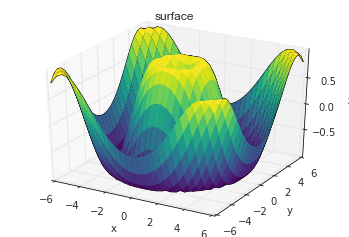

In [155]:
# Let's create a figure
fig = plt.figure()
ax = plt.axes(projection='3d')

# 3D contour plot
ax.contour3D(X, Y, Z, 50, cmap='binary')

# Add wireframe
ax.plot_wireframe(X, Y, Z, colors='black')

# 3D surface  plot
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')  

# Add titles and labels
ax.set_title('surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## <span style="color:#1A9FFF">Tut 1c Handling Subplots</span>
Sometimes it is helpful to compare different views of data side by side.
There are three common methods for creating subplots in Matplotlib:

<ul>
    <li>`plt.axes()` or `fig.add_axes()`</li>
    <li>`plt.subplots()`</li>
    <li>`plt.GridSpec()`</li>
</ul>

`plt.axes()` is the most basic method of creating an axes. 

By default, it creates a standard axes object that fills the entire figure. `plt.axes()` also takes an optional argument that is a list of four numbers in the figure coordinate system. 

There numbers represent [botton, left, width, height] in the fugure coordinate system.

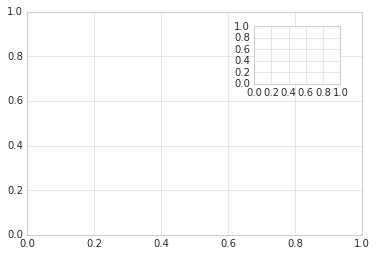

In [156]:
%matplotlib inline
# standard axes and subplot axes
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Note that the scale of x-axis and y-axis is different

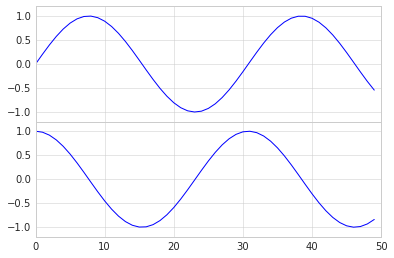

In [157]:
# Equavalent Object-oriented interface
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], ylim=(-1.2, 1.2), xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

note that `xticklabels=[]` removes the ticks on x-axis, which we will cover soon.

`plt.subplots()` is used to create aligned columns or rows of subplots.

Suppose we wish to create a 2X3 grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale

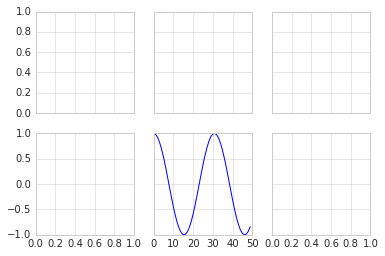

In [158]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# Let's plot a simple function
ax[1, 1].plot(np.cos(x));

Note that by sharing the axis scale, the labels in some subplots are automatically hidden.

`plt.GridSpec` is used to go beyond a regular grid to subplots that span multiple rows and columns.

Note that `plt.GridSpec()` object does not create a plot by itself, it is simply a convenient interface that is recognized by the `plt.subplot()` command.

Suppose a gridspec for a grid of two rows and three columns with some specified width and height space looks like below

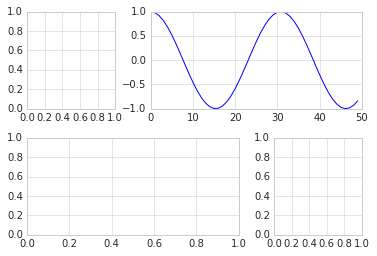

In [159]:
# Create grid object
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

# create subplots based on grid object
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1:])
ax3 = plt.subplot(grid[1, :2])
ax4 = plt.subplot(grid[1, 2]);

ax2.plot(np.cos(x));

## <span style="color:#FF8B33">Exercise 1 (10 mins break)</span> 
Open `Week3 - Exercise 1.ipynb` and complete the exercises.

# <span style="color:#1A9FFF"> 2. Plots from Pandas </span>
Draw Simple plots directly from data structures (Series and DataFrames) of Pandas package.

## <span style="color:#1A9FFF">Tut 2a Quick Start</span>

### Draw from A Series

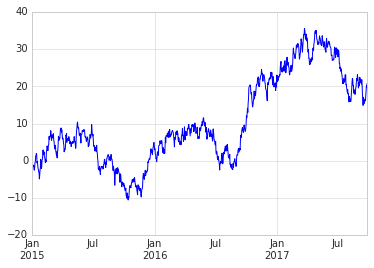

In [160]:
# Create a Series
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2015', periods=1000))
s = s.cumsum()  # cumulative sum

# draw a curve from the defined Series
s.plot()

### Draw from A DataFrames
On DataFrame, `plot()` is a convenience to plot all of the columns with labels:

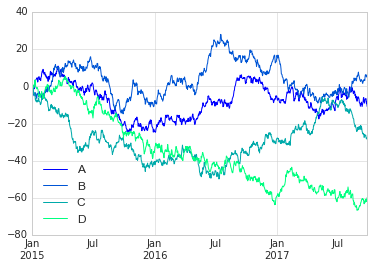

In [172]:
# Create a DataFrames
df = pd.DataFrame(np.random.randn(1000, 4), index=s.index, columns=list('ABCD'))
df = df.cumsum()  # cumulative sum

# draw a curve from the defined DataFrames
df.plot(colormap='winter'); 

Check options of colormap: http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

You can plot one column versus another using the `x` and `y` keywords in `plot()`:

## <span style="color:#1A9FFF">Tut 2b Other Plots</span>
<ul>
    <li>Bar Plot</li>
    <li>Histograms</li>
    <li>Scatter</li>
    <li>Pie Plot</li>
    <li>Subplot</li>
</ul>

### Bar Plot

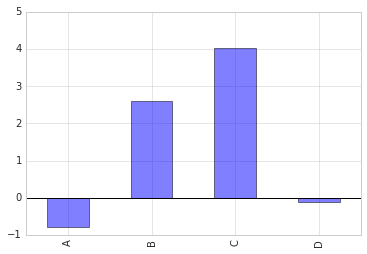

In [165]:
# pick the data from "Jan 2017", and plot the bar plot
df1 = df.iloc[5]

# bar plot
df1.plot.bar(color='b', alpha=0.5);
plt.axhline(0, color='k'); # set the color of axis

Calling a DataFrame’s `plot.bar()` method produces a multiple bar plot :

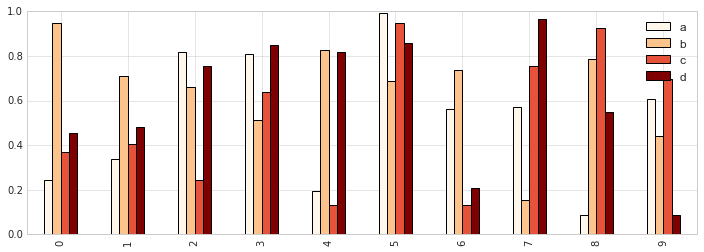

In [166]:
# define a DataFrame
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

# bar plot
df2.plot.bar(figsize=(12, 4), colormap='OrRd');

To produce a stacked bar plot, pass `stacked=True`:

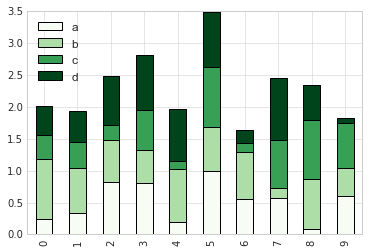

In [167]:
# stacked bar plot
df2.plot.bar(stacked=True, colormap='Greens');

To get horizontal bar plots, use the `barh` method:

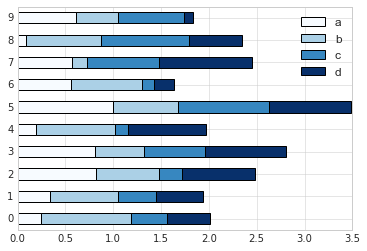

In [168]:
# stacked horizontal bar plot
df2.plot.barh(stacked=True, colormap='Blues');

### Histogram

Histogram can be drawn by using the `DataFrame.plot.hist()` and `Series.plot.hist()` methods.

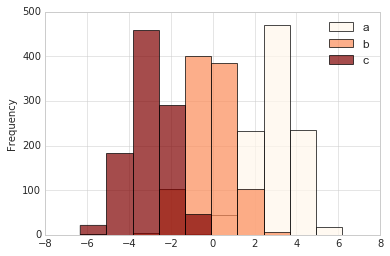

In [129]:
# define a DataFrame
df4 = pd.DataFrame({'a': np.random.randn(1000) + 3, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 3}, columns=['a', 'b', 'c'])

# histogram ploting
df4.plot.hist(alpha=0.7, colormap='OrRd')

Histogram can be stacked by `stacked=True`. Bin size can be changed by `bins` keyword.

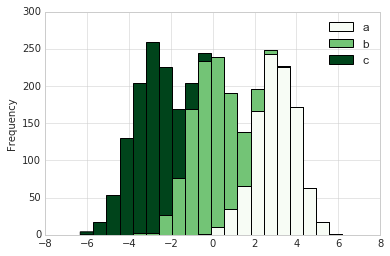

In [169]:
# stack setting and bins number setting
df4.plot.hist(stacked=True, bins=20, colormap='Greens')

`DataFrame.hist()` plots the histograms of the columns on multiple subplots:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe0aed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11024b6d0>]], dtype=object)

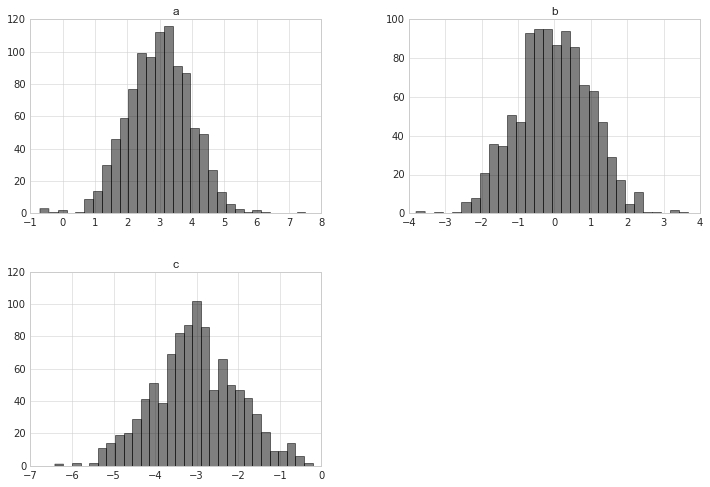

In [40]:
df4.hist(color='k', alpha=0.5, bins=30, figsize=(12, 8))

### Scatter Plot

Scatter plot can be drawn by using the `DataFrame.plot.scatter()` method. Scatter plot requires numeric columns for `x` and `y` axis. These can be specified by `x` and `y` keywords each.

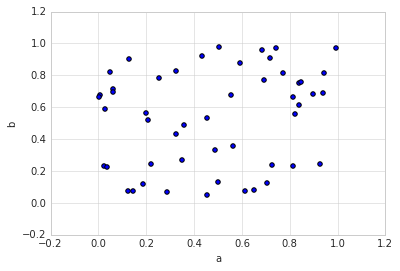

In [52]:
# define a DataFrame
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

# plot scatter
df.plot.scatter(x='a', y='b', figsize=(6, 4));

To plot multiple column groups in a single axes, repeat `plot` method specifying target `ax`. It is recommended to specify `color` and `label` keywords to distinguish each groups.

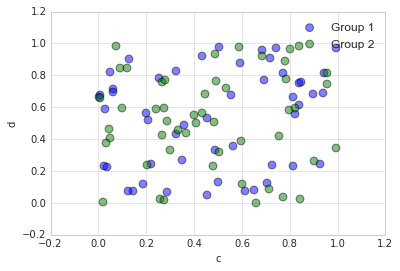

In [62]:
# get ax from scatter figure
ax = df.plot.scatter(x='a', y='b', color='Blue', label='Group 1', s=60, alpha=0.5);

# draw on the same ax
df.plot.scatter(x='c', y='d', color='Green', label='Group 2', ax=ax, s=60, alpha=0.5);

The keyword `c` may be given as the name of a column to provide colors for each point:

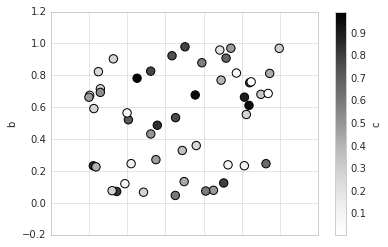

In [61]:
# draw with the color 'c' keyword
df.plot.scatter(x='a', y='b', c='c', s=70);

Below example shows a bubble chart using a dataframe column values as bubble size.

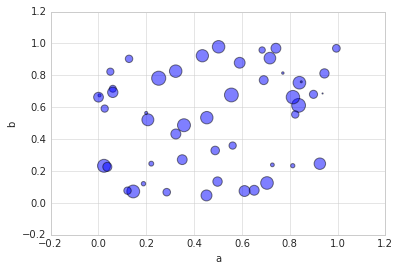

In [64]:
# plot dots with various size defined by df['c']
df.plot.scatter(x='a', y='b', s=df['c']*200, alpha=0.5);

### Pie Plot

You can create a pie plot with `DataFrame.plot.pie()` or `Series.plot.pie()`. If your data includes any `NaN`, they will be automatically filled with `0`. A ValueError will be raised if there are any negative values in your data.

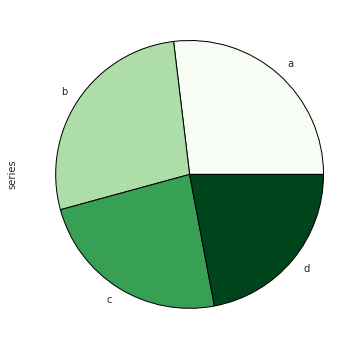

In [121]:
# create a series
s = pd.Series(3 * np.random.rand(4)+3, index=['a', 'b', 'c', 'd'], name='series')

# draw a pie plot
s.plot.pie(figsize=(6, 6), colormap='Greens')

Note that pie plot with DataFrame requires that you either specify a target column by the `y` argument or `subplots=True`. When `y` is specified, pie plot of selected column will be drawn. If `subplots=True` is specified, pie plots for each column are drawn as subplots. A legend will be drawn in each pie plots by default; specify `legend=False` to hide it.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115d43050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116d0c150>], dtype=object)

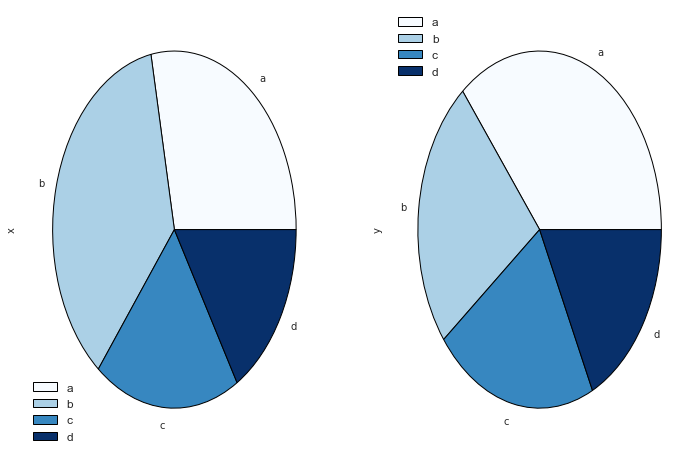

In [185]:
# define a DataFrame
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

# draw multiple pie plots
df.plot.pie(subplots=True, figsize=(12, 8), colormap='Blues')

For pie plots it’s best to use square figures, one’s with an equal aspect ratio. You can create the figure with equal width and height, or force the aspect ratio to be equal after plotting by calling `ax.set_aspect('equal')` on the returned `axes` object.

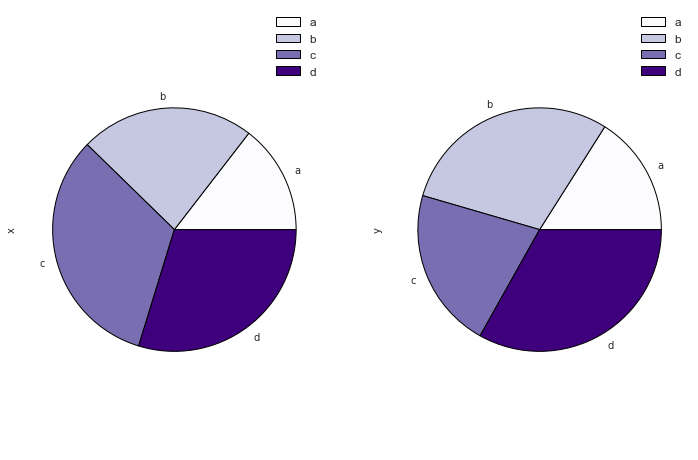

In [189]:
# define a DataFrame
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

# draw multiple pie plots
axes = df.plot.pie(subplots=True, figsize=(12, 8), colormap='Purples') # return two axes since two plots included
axes[0].set_aspect('equal') # draw pies with equal aspect ratio
axes[1].set_aspect('equal')

If you pass values whose sum total is less than 1.0, matplotlib draws a semicircle.

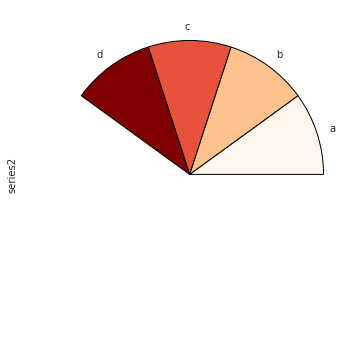

In [127]:
# create a series
s = pd.Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2')

# draw a pie plot
s.plot.pie(figsize=(6, 6), colormap='OrRd')

### Subplot

Each Series in a DataFrame can be plotted on a different axis with the `subplots` keyword:

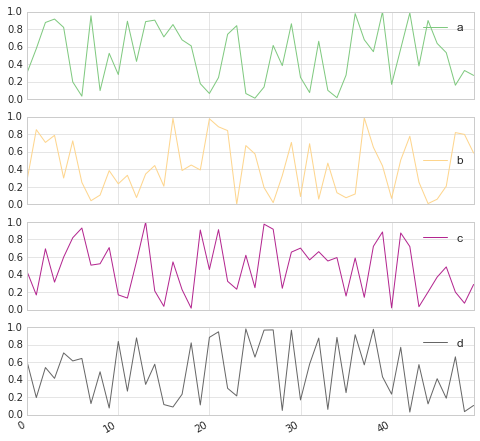

In [199]:
# define a DataFrame
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

# subplot example
df.plot(subplots=True, figsize=(8, 8), colormap='Accent');

The layout of subplots can be specified by `layout` keyword. It can accept `(rows, columns)`. The `layout` keyword can be used in `hist` and `boxplot` also. If input is invalid, `ValueError` will be raised.

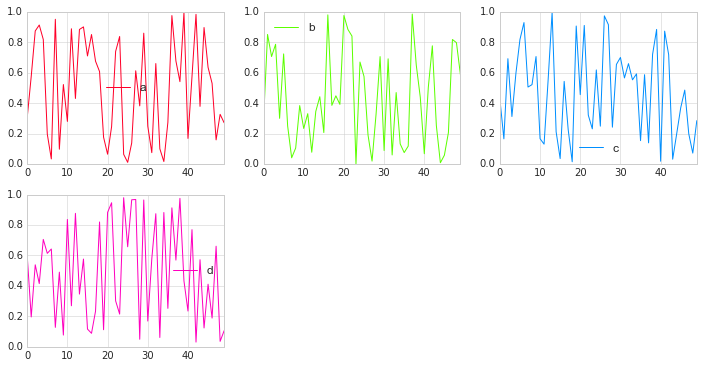

In [203]:
# define subplots with 2 rows and 3 columns by layout keyword
df.plot(subplots=True, layout=(2, 3), figsize=(12, 6), sharex=False, colormap='gist_rainbow'); 

The number of axes which can be contained by rows x columns specified by `layout` must be larger than the number of required subplots. If layout can contain more axes than required, blank axes are not drawn. Similar to a numpy array’s reshape method, you can use `-1` for one dimension to automatically calculate the number of rows or columns needed, given the other.

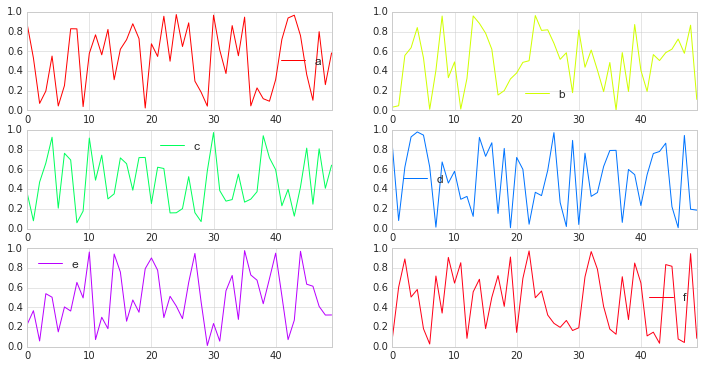

In [208]:
# define a DataFrame
df = pd.DataFrame(np.random.rand(50, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])

# define subplots with 3 rows and 2 columns by layout keyword
df.plot(subplots=True, layout=(3, -1), figsize=(12, 6), sharex=False, colormap='hsv');

passing an `ax` argument to `Series.plot()` to plot on a particular axis:

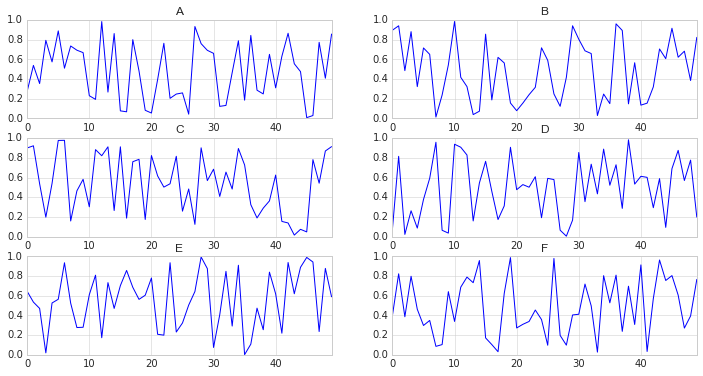

In [210]:
# define a figure object for 6 plots (3 rows and 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6)) 


# define a DataFrame
df = pd.DataFrame(np.random.rand(50, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])


# draw plots seperately
df['a'].plot(ax=axes[0,0]); axes[0,0].set_title('A');
df['b'].plot(ax=axes[0,1]); axes[0,1].set_title('B');
df['c'].plot(ax=axes[1,0]); axes[1,0].set_title('C');
df['d'].plot(ax=axes[1,1]); axes[1,1].set_title('D');
df['e'].plot(ax=axes[2,0]); axes[2,0].set_title('E');
df['f'].plot(ax=axes[2,1]); axes[2,1].set_title('F');

## <span style="color:#1A9FFF">Tut 2c Plotting from Matplotlib</span>

In some situations it may still be preferable or necessary to prepare plots directly with `matplotlib`, for instance when a certain type of plot or customization is not (yet) supported by `pandas`. `Series` and `DataFrame` objects behave like arrays and can therefore be passed directly to `matplotlib` functions without explicit casts.

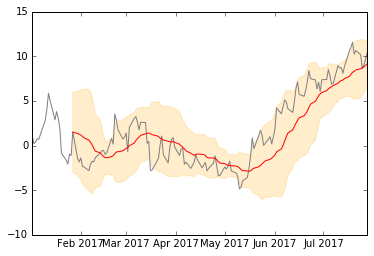

In [8]:
price = pd.Series(np.random.randn(150).cumsum(), index=pd.date_range('2017-1-1', periods=150, freq='B'))

price_mean = pd.rolling_mean(price, 20)  # average price     (in rolling window with size of 20)
price_std  = pd.rolling_std(price,  20)  # price variation   (in rolling window with size of 20)


# draw figure in matplotlib way

plt.figure()  # define a figure object

plt.plot(price.index, price, 'grey')         # x: index of price;       y: price
plt.plot(price_mean.index, price_mean, 'r')  # x: index of price_mean;  y: price_mean


plt.fill_between(price_std.index, price_mean-2*price_std, price_mean+2*price_std, color='orange', alpha=0.2)


## <span style="color:#FF8B33">Exercise 2 (10 mins break)</span> 
Open `Week3 - Exercise 2.ipynb` and complete the exercises.